<ipython-input-29-a267de090bef>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupancy_by_period = df.groupby('Period')['StudentID_Numeric'].sum().reset_index()


| Period      | Total_Numeric_StudentID_Count   |
|:------------|:--------------------------------|
| 9:00-10:30  | 35                              |
| 10:30-12:00 | 77                              |
| 12:00-13:30 | 56                              |
| 13:30-15:00 | 40                              |
| 15:00-16:30 | 54                              |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Period                         7 non-null      category
 1   Total_Numeric_StudentID_Count  7 non-null      int64   
dtypes: category(1), int64(1)
memory usage: 551.0 bytes
None


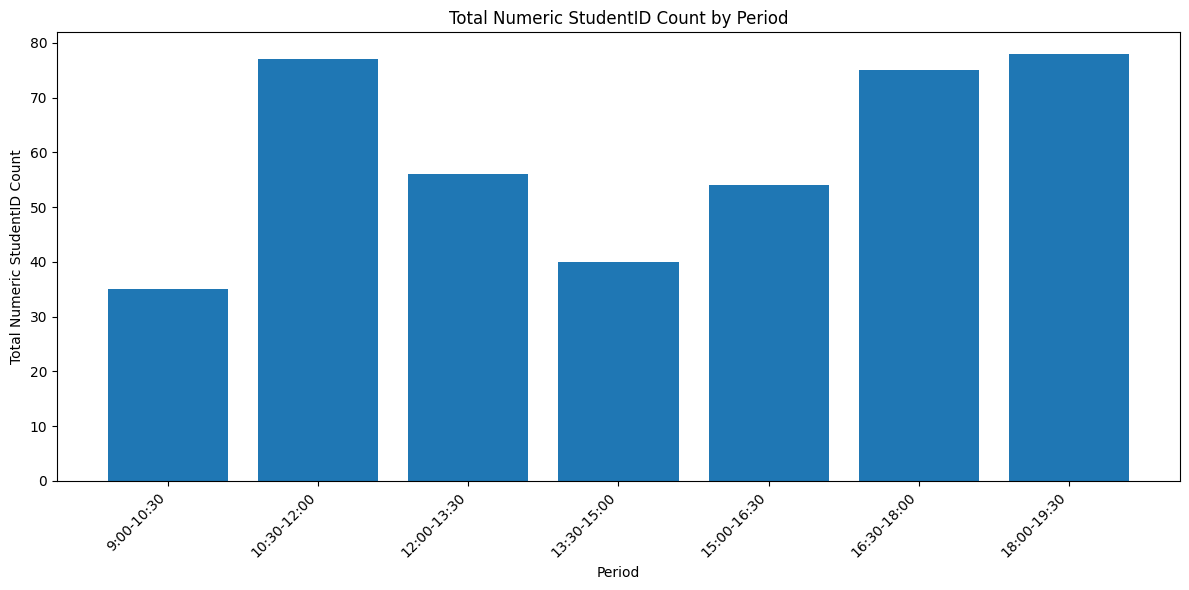

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'datos_inventados_V5.xlsx'

# Read the Excel file into a Pandas DataFrame
try:
    df = pd.read_excel(file_path, sheet_name='Sheet1')
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except Exception as e:
    print(f"Error reading Excel file: {e}")
    exit()

# Extract date and hour from "SampleDate" and "SampleHour"
df['Date'] = pd.to_datetime(df['SampleDate'], format='%d-%m-%y').dt.date
df['Hour'] = df['SampleHour'].astype(str)

# Define the periods with a specific order
periods = [
    {'start': '09:00', 'end': '10:30', 'label': '9:00-10:30'},
    {'start': '10:30', 'end': '12:00', 'label': '10:30-12:00'},
    {'start': '12:00', 'end': '13:30', 'label': '12:00-13:30'},
    {'start': '13:30', 'end': '15:00', 'label': '13:30-15:00'},
    {'start': '15:00', 'end': '16:30', 'label': '15:00-16:30'},
    {'start': '16:30', 'end': '18:00', 'label': '16:30-18:00'},
    {'start': '18:00', 'end': '19:30', 'label': '18:00-19:30'}
]
# Create a list of period labels in the desired order.
period_labels = [p['label'] for p in periods]

# Function to check if a value is numeric
def is_numeric(value):
    try:
        float(value)  # Check if the value can be converted to a float
        return True
    except ValueError:
        return False

# Apply the function to the 'StudentID' column and count the True values
df['StudentID_Numeric'] = df['StudentID'].apply(is_numeric)

# Function to assign a period to each hour
def assign_period(hour):
    for period in periods:
        if period['start'] <= hour <= period['end']:
            return period['label']
    return None  # Return None if the hour doesn't fall into any defined period

# Create a new column 'Period'
df['Period'] = df['Hour'].apply(assign_period)
# Convert 'Period' column to a categorical type with the specified order
df['Period'] = pd.Categorical(df['Period'], categories=period_labels, ordered=True)

# Group by 'Period' and sum the number of numeric StudentIDs
occupancy_by_period = df.groupby('Period')['StudentID_Numeric'].sum().reset_index()

# Rename the count column
occupancy_by_period = occupancy_by_period.rename(columns={'StudentID_Numeric': 'Total_Numeric_StudentID_Count'})

# Print the first 5 rows of the dataframe
print(occupancy_by_period.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column name and their data types
print(occupancy_by_period.info())

# Create a plot
plt.figure(figsize=(12, 6))
plt.bar(occupancy_by_period['Period'], occupancy_by_period['Total_Numeric_StudentID_Count'])
plt.xlabel('Period')
plt.ylabel('Total Numeric StudentID Count')
plt.title('Total Numeric StudentID Count by Period')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<ipython-input-35-d00de690eade>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')


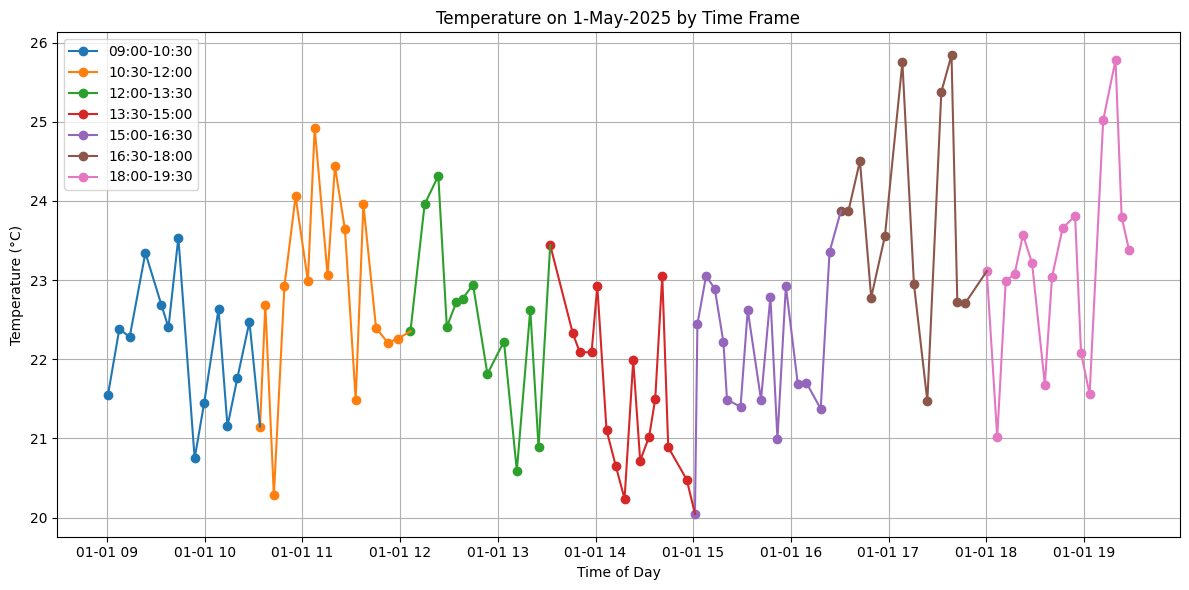

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'datos_inventados_V5.xlsx'
df = pd.read_excel(file_path)

# Convert SampleDate to datetime
df['SampleDate'] = pd.to_datetime(df['SampleDate'], dayfirst=True, errors='coerce')

# Filter for May 1, 2025
target_date = pd.to_datetime('2025-05-01')
filtered_df = df[df['SampleDate'].dt.date == target_date.date()]

# Convert 'SampleHour' to datetime for proper time handling
filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')

# Define the time frames
time_frames = [
    {'start': '09:00', 'end': '10:30', 'label': '09:00-10:30'},
    {'start': '10:30', 'end': '12:00', 'label': '10:30-12:00'},
    {'start': '12:00', 'end': '13:30', 'label': '12:00-13:30'},
    {'start': '13:30', 'end': '15:00', 'label': '13:30-15:00'},
    {'start': '15:00', 'end': '16:30', 'label': '15:00-16:30'},
    {'start': '16:30', 'end': '18:00', 'label': '16:30-18:00'},
    {'start': '18:00', 'end': '19:30', 'label': '18:00-19:30'}
]

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

previous_end_temp = None
previous_end_time = None
previous_color = None

for i, frame in enumerate(time_frames):
    start_time = pd.to_datetime(frame['start'], format='%H:%M')
    end_time = pd.to_datetime(frame['end'], format='%H:%M')

    # Filter data for the current time frame
    frame_df = filtered_df[(filtered_df['SampleHour'].dt.time >= start_time.time()) &
                           (filtered_df['SampleHour'].dt.time < end_time.time())]

    # Plot the temperature for the current time frame
    color = f'C{i}'  # Get a different color for each time frame
    plt.plot(frame_df['SampleHour'], frame_df['Temp'], marker='o', linestyle='-', color=color, label=frame['label'])

    # Connect the last point of the previous time frame with the first point of the current time frame
    if previous_end_temp is not None and len(frame_df) > 0:
        plt.plot([previous_end_time, frame_df['SampleHour'].iloc[0]], [previous_end_temp, frame_df['Temp'].iloc[0]],
                 linestyle='-', color=previous_color)

    # Store the last point's temperature and time for the next iteration
    if len(frame_df) > 0:
        previous_end_temp = frame_df['Temp'].iloc[-1]
        previous_end_time = frame_df['SampleHour'].iloc[-1]
        previous_color = color

plt.title('Temperature on 1-May-2025 by Time Frame')
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()  # Add a legend to distinguish the time frames
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-36-1d257b1d7344>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')


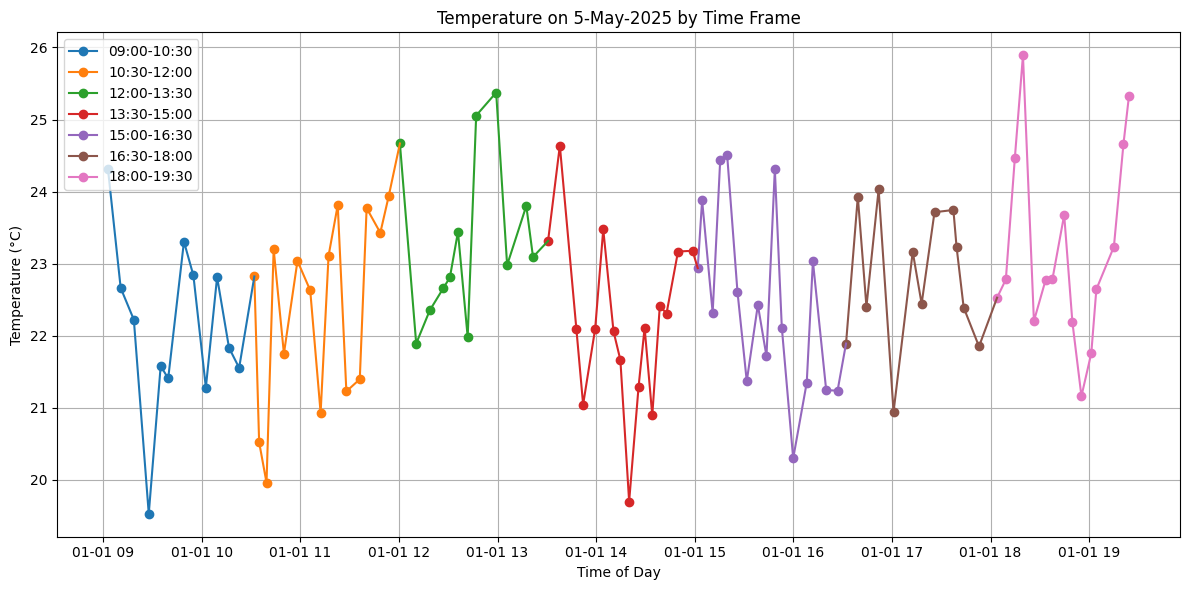

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'datos_inventados_V5.xlsx'
df = pd.read_excel(file_path)

# Convert SampleDate to datetime
df['SampleDate'] = pd.to_datetime(df['SampleDate'], dayfirst=True, errors='coerce')

# Filter for May 1, 2025
target_date = pd.to_datetime('2025-05-05')
filtered_df = df[df['SampleDate'].dt.date == target_date.date()]

# Convert 'SampleHour' to datetime for proper time handling
filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')

# Define the time frames
time_frames = [
    {'start': '09:00', 'end': '10:30', 'label': '09:00-10:30'},
    {'start': '10:30', 'end': '12:00', 'label': '10:30-12:00'},
    {'start': '12:00', 'end': '13:30', 'label': '12:00-13:30'},
    {'start': '13:30', 'end': '15:00', 'label': '13:30-15:00'},
    {'start': '15:00', 'end': '16:30', 'label': '15:00-16:30'},
    {'start': '16:30', 'end': '18:00', 'label': '16:30-18:00'},
    {'start': '18:00', 'end': '19:30', 'label': '18:00-19:30'}
]

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

previous_end_temp = None
previous_end_time = None
previous_color = None

for i, frame in enumerate(time_frames):
    start_time = pd.to_datetime(frame['start'], format='%H:%M')
    end_time = pd.to_datetime(frame['end'], format='%H:%M')

    # Filter data for the current time frame
    frame_df = filtered_df[(filtered_df['SampleHour'].dt.time >= start_time.time()) &
                           (filtered_df['SampleHour'].dt.time < end_time.time())]

    # Plot the temperature for the current time frame
    color = f'C{i}'  # Get a different color for each time frame
    plt.plot(frame_df['SampleHour'], frame_df['Temp'], marker='o', linestyle='-', color=color, label=frame['label'])

    # Connect the last point of the previous time frame with the first point of the current time frame
    if previous_end_temp is not None and len(frame_df) > 0:
        plt.plot([previous_end_time, frame_df['SampleHour'].iloc[0]], [previous_end_temp, frame_df['Temp'].iloc[0]],
                 linestyle='-', color=previous_color)

    # Store the last point's temperature and time for the next iteration
    if len(frame_df) > 0:
        previous_end_temp = frame_df['Temp'].iloc[-1]
        previous_end_time = frame_df['SampleHour'].iloc[-1]
        previous_color = color

plt.title('Temperature on 5-May-2025 by Time Frame')
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()  # Add a legend to distinguish the time frames
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-41-188e375caa3e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')
<ipython-input-41-188e375caa3e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame_df.loc[:, 'Luminosity_Binary'] = frame_df['Luminosity'].apply(lambda x: 'on' if x > 100 else 'off')
<ipython-input-41-188e375caa3e>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

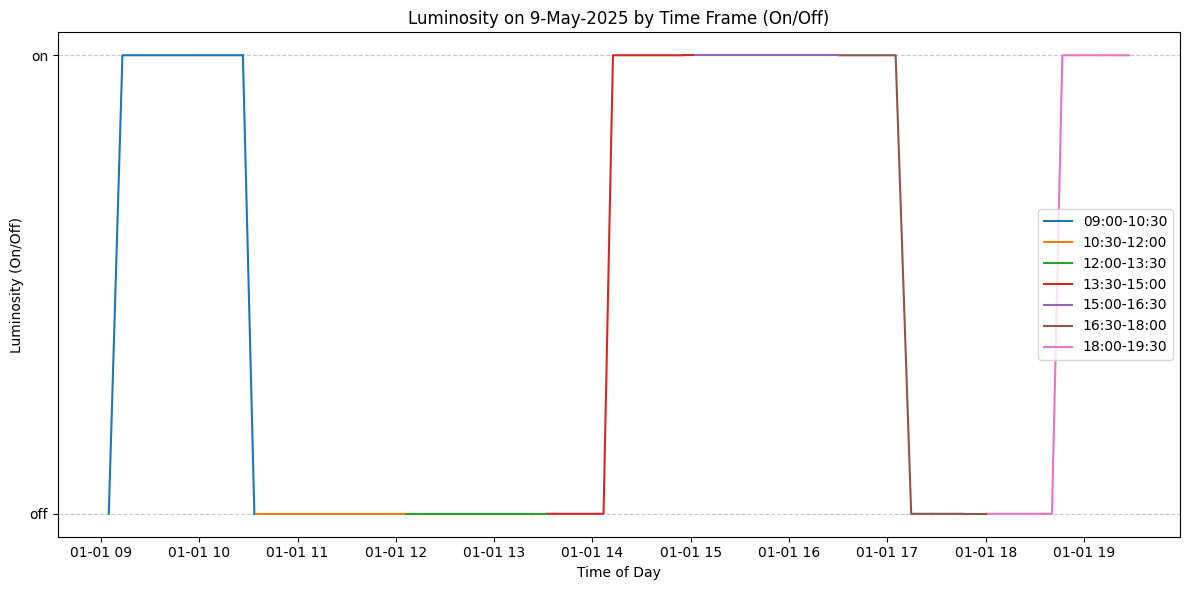

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'datos_inventados_V5.xlsx'
df = pd.read_excel(file_path)

# Convert SampleDate to datetime
df['SampleDate'] = pd.to_datetime(df['SampleDate'], dayfirst=True, errors='coerce')

# Filter for the target date
target_date = pd.to_datetime('2025-05-09')
filtered_df = df[df['SampleDate'].dt.date == target_date.date()]

# Convert 'SampleHour' to datetime for proper time handling
filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')

# Define the time frames
time_frames = [
    {'start': '09:00', 'end': '10:30', 'label': '09:00-10:30'},
    {'start': '10:30', 'end': '12:00', 'label': '10:30-12:00'},
    {'start': '12:00', 'end': '13:30', 'label': '12:00-13:30'},
    {'start': '13:30', 'end': '15:00', 'label': '13:30-15:00'},
    {'start': '15:00', 'end': '16:30', 'label': '15:00-16:30'},
    {'start': '16:30', 'end': '18:00', 'label': '16:30-18:00'},
    {'start': '18:00', 'end': '19:30', 'label': '18:00-19:30'}
]

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

previous_end_luminosity = None
previous_end_time = None
previous_color = None

for i, frame in enumerate(time_frames):
    start_time = pd.to_datetime(frame['start'], format='%H:%M')
    end_time = pd.to_datetime(frame['end'], format='%H:%M')

    # Filter data for the current time frame
    frame_df = filtered_df[(filtered_df['SampleHour'].dt.time >= start_time.time()) &
                           (filtered_df['SampleHour'].dt.time < end_time.time())]

    # Apply the 0/1 conversion to 'Luminosity' and rename to 'Luminosity_Binary'
    frame_df.loc[:, 'Luminosity_Binary'] = frame_df['Luminosity'].apply(lambda x: 'on' if x > 100 else 'off')

    # Plot the Luminosity_Binary for the current time frame
    color = f'C{i}'  # Get a different color for each time frame
    plt.plot(frame_df['SampleHour'], frame_df['Luminosity_Binary'], linestyle='-', color=color, label=frame['label']) # Removed marker='o'

    # Connect the last point of the previous time frame with the first point of the current time frame
    if previous_end_luminosity is not None and len(frame_df) > 0:
        plt.plot([previous_end_time, frame_df['SampleHour'].iloc[0]], [previous_end_luminosity, frame_df['Luminosity_Binary'].iloc[0]],
                 linestyle='-', color=previous_color)

    # Store the last point's Luminosity_Binary and time for the next iteration
    if len(frame_df) > 0:
        previous_end_luminosity = frame_df['Luminosity_Binary'].iloc[-1]
        previous_end_time = frame_df['SampleHour'].iloc[-1]
        previous_color = color

plt.title('Luminosity on 9-May-2025 by Time Frame (On/Off)') # Changed title
plt.xlabel('Time of Day')
plt.ylabel('Luminosity (On/Off)') # Changed y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Changed grid to only show for y-axis
plt.legend()  # Add a legend to distinguish the time frames
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-46-008743cf086e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')


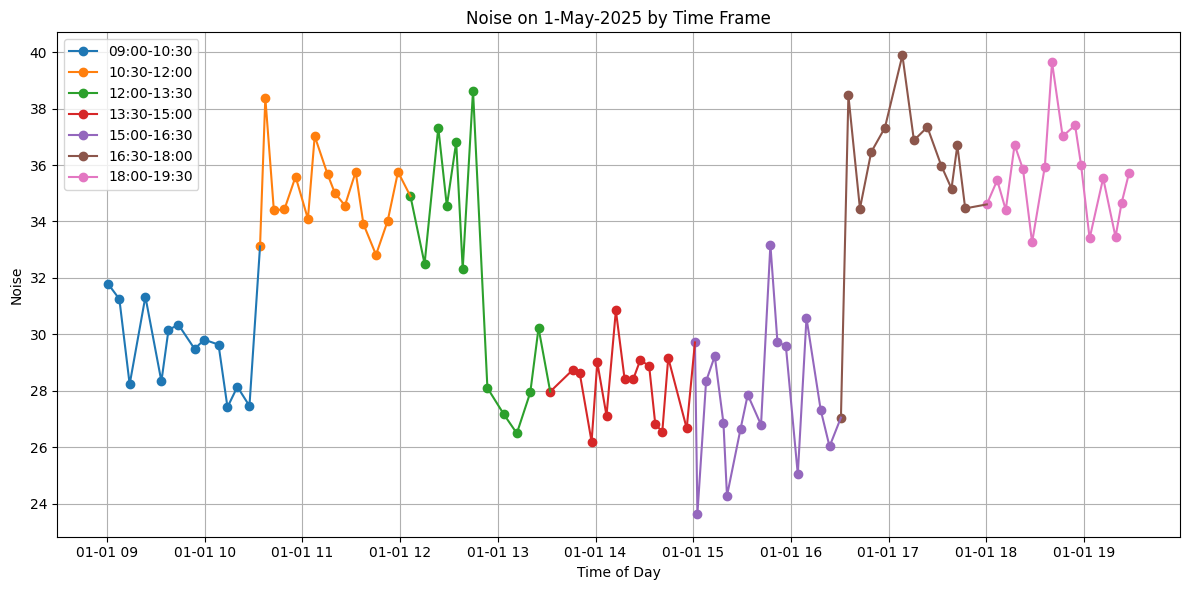

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'datos_inventados_V5.xlsx'
df = pd.read_excel(file_path)

# Convert SampleDate to datetime
df['SampleDate'] = pd.to_datetime(df['SampleDate'], dayfirst=True, errors='coerce')

# Filter for May 1, 2025
target_date = pd.to_datetime('2025-05-01')
filtered_df = df[df['SampleDate'].dt.date == target_date.date()]

# Convert 'SampleHour' to datetime for proper time handling
filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S')

# Define the time frames
time_frames = [
    {'start': '09:00', 'end': '10:30', 'label': '09:00-10:30'},
    {'start': '10:30', 'end': '12:00', 'label': '10:30-12:00'},
    {'start': '12:00', 'end': '13:30', 'label': '12:00-13:30'},
    {'start': '13:30', 'end': '15:00', 'label': '13:30-15:00'},
    {'start': '15:00', 'end': '16:30', 'label': '15:00-16:30'},
    {'start': '16:30', 'end': '18:00', 'label': '16:30-18:00'},
    {'start': '18:00', 'end': '19:30', 'label': '18:00-19:30'}
]

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

previous_end_noise = None
previous_end_time = None
previous_color = None

for i, frame in enumerate(time_frames):
    start_time = pd.to_datetime(frame['start'], format='%H:%M')
    end_time = pd.to_datetime(frame['end'], format='%H:%M')

    # Filter data for the current time frame
    frame_df = filtered_df[(filtered_df['SampleHour'].dt.time >= start_time.time()) &
                           (filtered_df['SampleHour'].dt.time < end_time.time())]

    # Plot the noise for the current time frame
    color = f'C{i}'  # Get a different color for each time frame
    plt.plot(frame_df['SampleHour'], frame_df['Noise'], marker='o', linestyle='-', color=color, label=frame['label'])

    # Connect the last point of the previous time frame with the first point of the current time frame
    if previous_end_noise is not None and len(frame_df) > 0:
        plt.plot([previous_end_time, frame_df['SampleHour'].iloc[0]], [previous_end_noise, frame_df['Noise'].iloc[0]],
                 linestyle='-', color=previous_color)

    # Store the last point's noise and time for the next iteration
    if len(frame_df) > 0:
        previous_end_noise = frame_df['Noise'].iloc[-1]
        previous_end_time = frame_df['SampleHour'].iloc[-1]
        previous_color = color

plt.title('Noise on 1-May-2025 by Time Frame')
plt.xlabel('Time of Day')
plt.ylabel('Noise')
plt.grid(True)
plt.legend()  # Add a legend to distinguish the time frames
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


<ipython-input-47-544ac4ddec4b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S').dt.hour


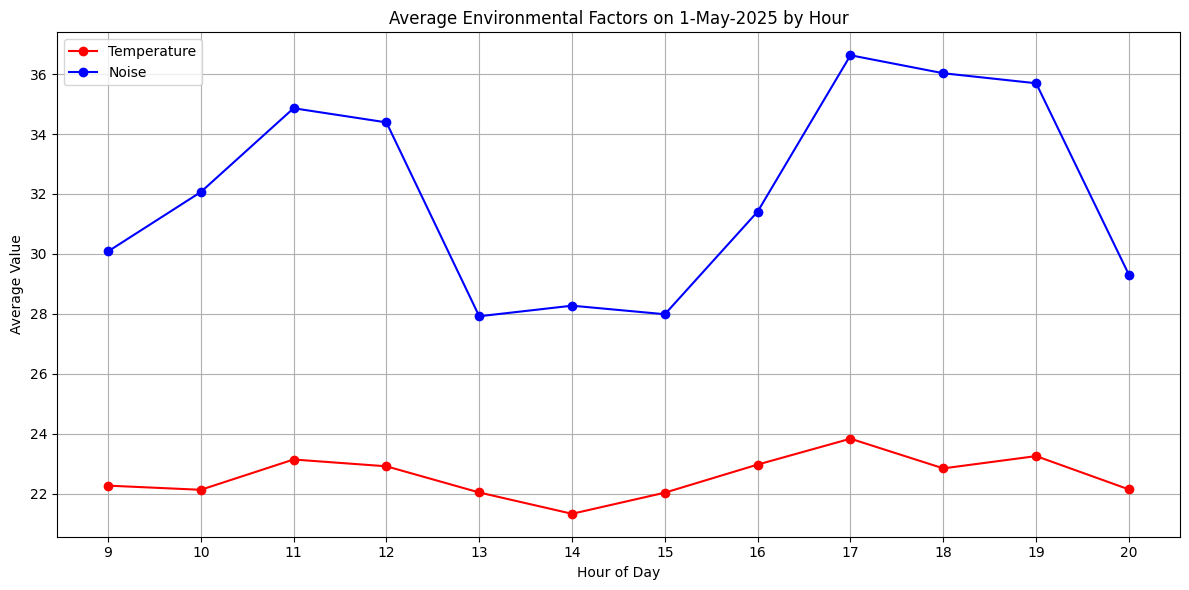

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'datos_inventados_V5.xlsx'
df = pd.read_excel(file_path)

# Convert SampleDate to datetime
df['SampleDate'] = pd.to_datetime(df['SampleDate'], dayfirst=True, errors='coerce')

# Filter for May 1, 2025
target_date = pd.to_datetime('2025-05-01')
filtered_df = df[df['SampleDate'].dt.date == target_date.date()]

# Convert 'SampleHour' to datetime for proper time handling and extract hour
filtered_df['SampleHour'] = pd.to_datetime(filtered_df['SampleHour'], format='%H:%M:%S').dt.hour

# Group by 'SampleHour' and calculate the mean for 'Temp', and 'Noise'
average_df = filtered_df.groupby('SampleHour')[['Temp', 'Noise']].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability

# Plot average temperature
plt.plot(average_df['SampleHour'], average_df['Temp'], marker='o', linestyle='-', color='r', label='Temperature')

# Plot average noise
plt.plot(average_df['SampleHour'], average_df['Noise'], marker='o', linestyle='-', color='b', label='Noise')

plt.title('Average Environmental Factors on 1-May-2025 by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.grid(True)
plt.legend()  # Add a legend to distinguish the factors
plt.xticks(average_df['SampleHour']) # Ensure all hours are displayed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
